In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['cp'][data['cp'] == 1] = 'typical angina'
data['cp'][data['cp'] == 2] = 'atypical angina'
data['cp'][data['cp'] == 3] = 'non-anginal pain'
data['cp'][data['cp'] == 4] = 'asymptomatic'

data['fbs'][data['fbs'] == 0] = 'lower than 120mg/ml'
data['fbs'][data['fbs'] == 1] = 'greater than 120mg/ml'

data['restecg'][data['restecg'] == 0] = 'normal'
data['restecg'][data['restecg'] == 1] = 'ST-T wave abnormality'
data['restecg'][data['restecg'] == 2] = 'left ventricular hypertrophy'

data['exang'][data['exang'] == 0] = 'no'
data['exang'][data['exang'] == 1] = 'yes'

data['slope'][data['slope'] == 1] = 'upsloping'
data['slope'][data['slope'] == 2] = 'flat'
data['slope'][data['slope'] == 3] = 'downsloping'

data['thal'][data['thal'] == 1] = 'normal'
data['thal'][data['thal'] == 2] = 'fixed defect'
data['thal'][data['thal'] == 3] = 'reversable defect'

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata

In [8]:
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['thal'] = data['thal'].astype('object')

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [10]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

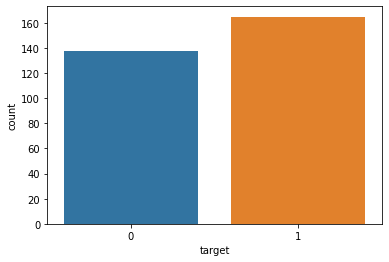

In [11]:
sns.countplot('target', data=data)

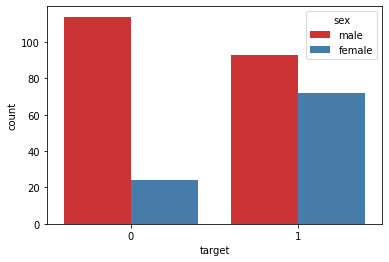

In [12]:
sns.countplot('target', data=data, hue='sex', palette="Set1")

In [13]:
data[['target', 'sex']].groupby(['sex'], as_index=False).mean().sort_values(by='sex', ascending=False)

,sex,target
1,male,0.449275
0,female,0.750000


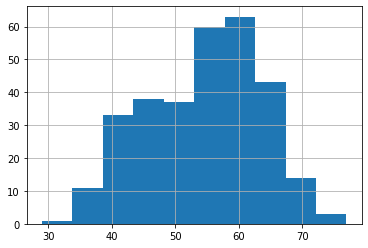

In [14]:
data['age'].hist()

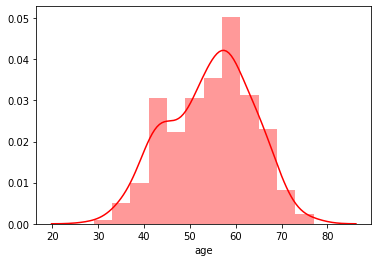

In [15]:
sns.distplot(data['age'], color = 'red')

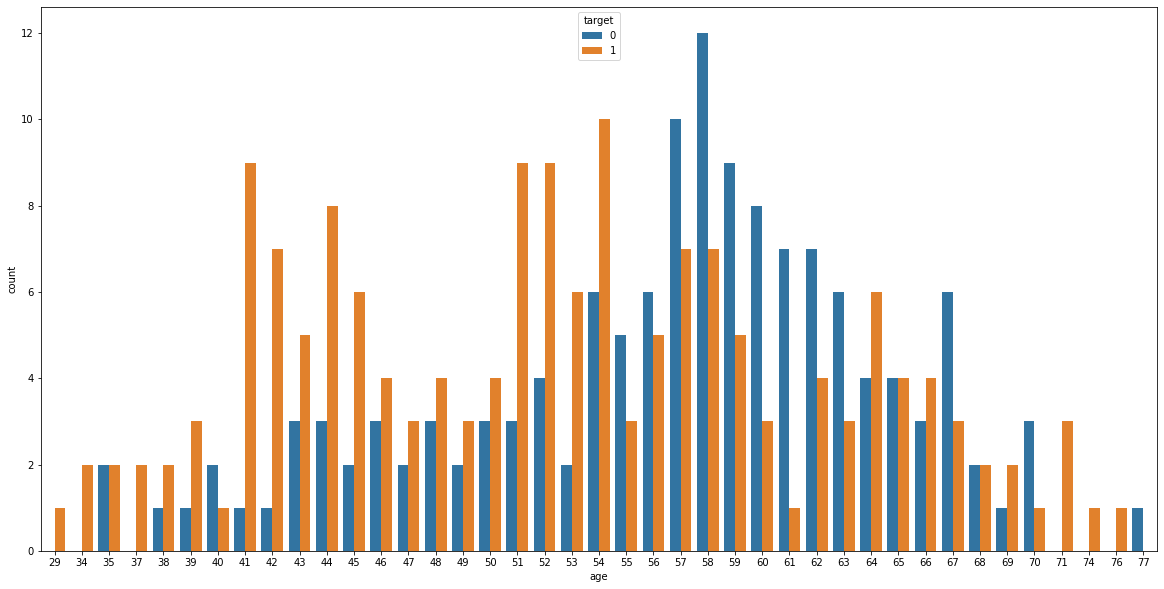

In [16]:
plt.figure(figsize=(20,10))
sns.countplot('age', hue='target', data=data)

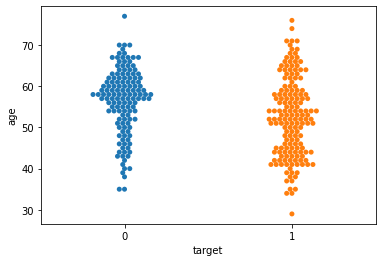

In [17]:
sns.swarmplot('target', 'age', data=data)

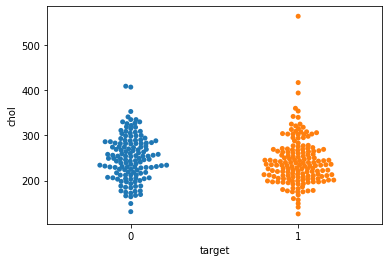

In [18]:
sns.swarmplot('target', 'chol', data=data)

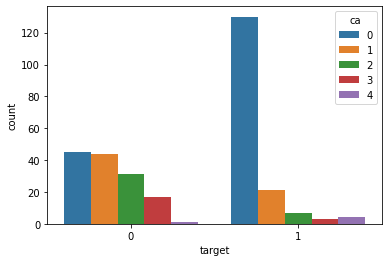

In [19]:
sns.countplot('target', hue='ca', data=data)

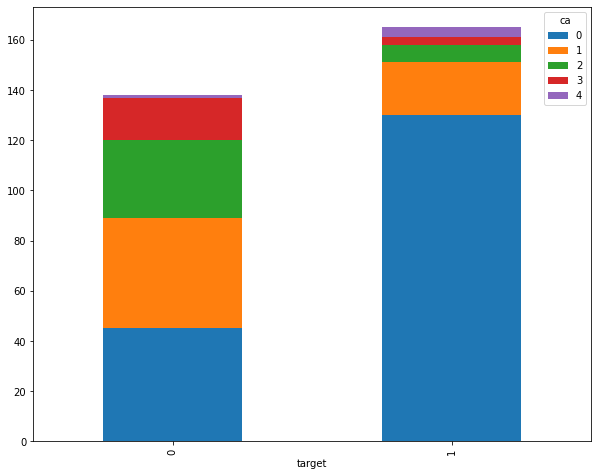

In [20]:
data.groupby(['target','ca']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()

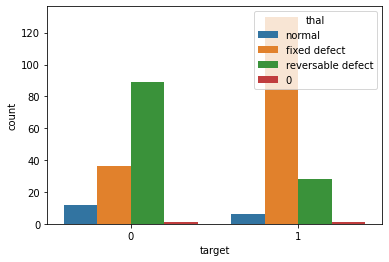

In [21]:
sns.countplot('target', hue='thal', data=data)

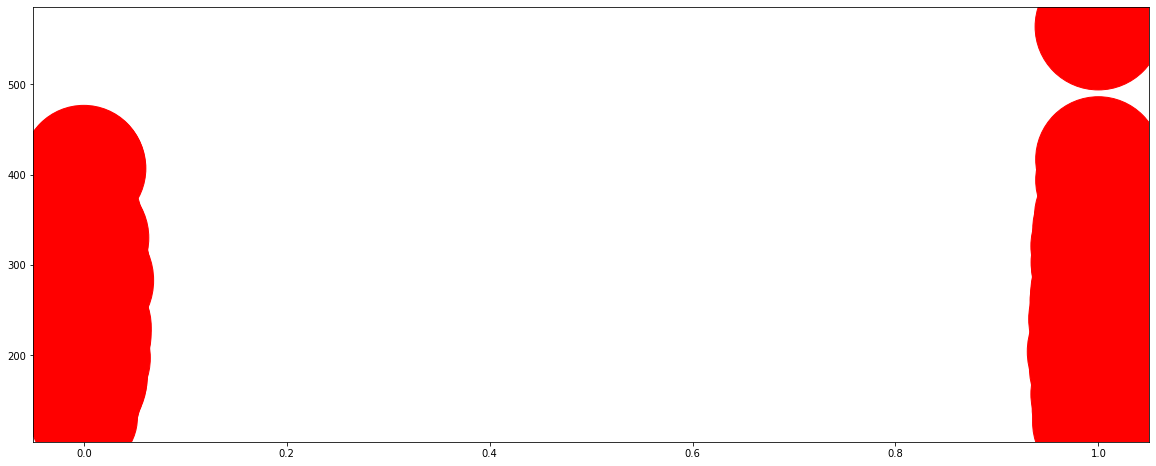

In [22]:
plt.figure( figsize=(20,8))
plt.scatter(x = data['target'], y = data['chol'], s = data['thalach']*100, color = 'red')

In [23]:
label = data['target']

In [24]:
label.unique()

array([1, 0], dtype=int64)

In [25]:
label.value_counts()

1    165
0    138
Name: target, dtype: int64

In [26]:
data=data.drop(['target'], axis=1)

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect


In [28]:
label.shape

(303,)

In [29]:
data = pd.get_dummies(data, drop_first=True)

In [30]:
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0


In [31]:
x = data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.2)

In [34]:
x_train.shape

(242, 19)

In [35]:
x_test.shape

(61, 19)

In [36]:
y_train.shape

(242,)

In [37]:
y_test.shape

(61,)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
mod1 = RandomForestClassifier()
mod1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
mod2 = DecisionTreeClassifier()
mod2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
pred_1 = mod1.predict(x_test)
pred_quant1 = mod1.predict_proba(x_test)[:, 1]
pred1 = mod1.predict(x_test)

pred_2 = mod2.predict(x_test)
pred_quant2 = mod2.predict_proba(x_test)[:, 1]
pred2 = mod2.predict(x_test)


In [42]:
score1_train=mod1.score(x_train, y_train)
print(f'Training Random Forest: {round(score1_train*100,2)}%')

score1_test=mod1.score(x_test,y_test)
print(f'Testing Random Forest: {round(score1_test*100,2)}%')

Training Random Forest: 100.0%
Testing Random Forest: 78.69%


In [43]:
score2_train=mod2.score(x_train, y_train)
print(f'Training Decision Tree: {round(score2_train*100,2)}%')

score2_test=mod2.score(x_test,y_test)
print(f'Testing Decision Tree: {round(score2_test*100,2)}%')

Training Decision Tree: 100.0%
Testing Decision Tree: 73.77%


In [44]:
from sklearn.metrics  import confusion_matrix

In [45]:
confusion_matrix(y_test, pred1)

array([[23,  7],
       [ 6, 25]], dtype=int64)

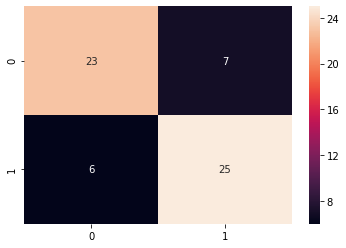

In [46]:
sns.heatmap(confusion_matrix(y_test, pred1), annot=True)

In [47]:
confusion_matrix(y_test, pred2)

array([[21,  9],
       [ 7, 24]], dtype=int64)

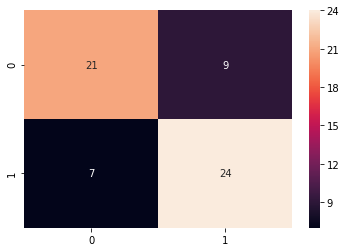

In [48]:
sns.heatmap(confusion_matrix(y_test, pred2), annot=True)

In [49]:
y_pred_quant1 = mod1.predict_proba(x_test)[:, 1]

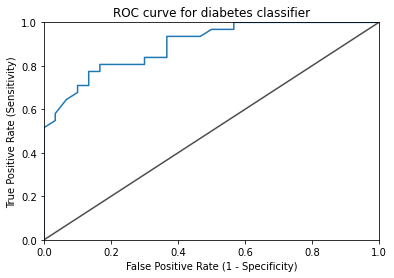

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [54]:
import eli5 
from eli5.sklearn import PermutationImportance
perm1 = PermutationImportance(mod1, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm1, feature_names = x_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0636,ca
0.0197 ± 0.0321,restecg_normal
0.0164 ± 0.0415,sex_male
0.0131 ± 0.0382,exang_yes
0.0098 ± 0.0393,thal_fixed defect
0.0098 ± 0.0445,oldpeak
0.0066 ± 0.0262,thal_reversable defect
0.0066 ± 0.0262,trestbps
0.0033 ± 0.0131,fbs_lower than 120mg/ml
0 ± 0.0000,restecg_left ventricular hypertrophy


In [55]:
perm2 = PermutationImportance(mod2, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm2, feature_names = x_test.columns.tolist())

Weight,Feature
0.0885 ± 0.0608,thal_fixed defect
0.0852 ± 0.0730,oldpeak
0.0197 ± 0.0382,cp_non-anginal pain
0.0197 ± 0.0245,cp_atypical angina
0.0131 ± 0.0482,thalach
0.0066 ± 0.0334,age
0.0033 ± 0.0245,ca
0.0000 ± 0.0207,chol
0 ± 0.0000,sex_male
0 ± 0.0000,thal_reversable defect
